<a href="https://colab.research.google.com/github/LemonZest0/ml-regression/blob/main/bulldozer_prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the Sale Price of Bulldozers sold at Auctions🚜

This notebook looks into using various Python-based machine learning Data Science libraries in an attempt to build a machine learning **regression model**.

The goal of the model is to predict the sale price of a particular piece of Buldozers at Auction.

## 1. Problem Definition
Build a predictive ML model that gives
> **the sale price of a particular heavy equipment at Auction**

on the basis of it's usage, equipment type and configuration.

## 2. Data
The data is downloaded from Kaggle [Blue Book for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data) Competition. It is sourced from auction result postings and contains information like usage and equipment configurations.

We are provided with 3 Datasets as follows:
* Train.csv - training set containing data through the end of 2011, having  51 attributes including target variable `SalePrice` (model will train on this).
* Valid.csv - validation set containing data from *January 01, 2012 - April 30, 2012*. (model makes practices on this data)
* Test.csv - test set containing data from *May 01, 2012 - November 2012*. (model make predictions for `SalePrice` on this dataset)

From the data we can understand that it is a time series problem.

## 3. Evaluation
The evaluation metric for this competition is **RMSLE** (root mean squared log error) between predicted and actual auction prices.

## 4. Features
For this problem statement, we are provided with a **[data dictionary](https://docs.google.com/spreadsheets/d/1VpSzQITmbINKG8ErQ8ltpk18g_rVT76w/edit?usp=sharing&ouid=114141208822836717813&rtpof=true&sd=true)** containing details of all the features of the dataset.

Key fields present in this dataset are:
* SalesID
* MachineID
* saleprice
* saledate

In [ ]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Import model 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# link drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import training an validation set
df = pd.read_csv("/content/drive/MyDrive/Challenges/Blue Book of Bulldozers/TrainAndValid.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

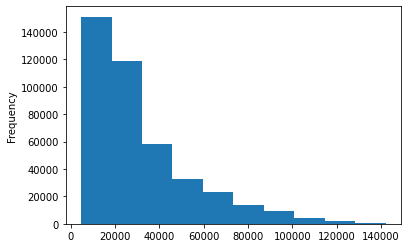

In [ ]:
df["SalePrice"].plot.hist();

In [ ]:
df["saledate"][:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

### Parse dates 
To parse dates in standard format, we use `parse_dates` from pandas.

In [ ]:
# Importing data with parse_dates
df = pd.read_csv("/content/drive/MyDrive/Challenges/Blue Book of Bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [ ]:
# check for saledate data type
df["saledate"].dtype

dtype('<M8[ns]')

In [ ]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

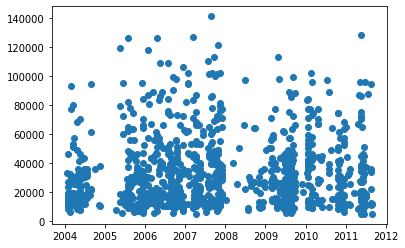

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [ ]:
# Sort dataframe by date
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df["saledate"][:10]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Add date time parameters from `saledate` 
Adding parameters fo sale like Year, Month, Day, Day of Week and Day of Year.

In [ ]:
df_fun = df.copy()

In [ ]:
df_fun["saleYear"] = df_fun.saledate.dt.year
df_fun["saleMonth"] = df_fun.saledate.dt.month
df_fun["saleDay"] = df_fun.saledate.dt.day
df_fun["saleDayOfWeek"] = df_fun.saledate.dt.dayofweek
df_fun["saleDayOfYear"] = df_fun.saledate.dt.dayofyear

In [ ]:
df_fun.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [ ]:
# Drop 'saledate' 
df_fun.drop("saledate", axis = 1, inplace=True)

### Convert String to Numbers categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

In [ ]:
# Convert strings to category
for label, content in df_fun.items():
    if pd.api.types.is_string_dtype(content):
        df_fun[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_fun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [ ]:
# We can access each category as codes
df_fun.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Dealing with Null values


In [ ]:
df_fun.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Seperation of Train and Validation dataset

In [ ]:
# Seperating Validation and Train dataset
df_train = df_fun[df_fun.saleYear != 2012]
df_val = df_fun[df_fun.saleYear == 2012]

In [ ]:
df_fun.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


**Filling missing numerical data**

In [ ]:
## Function to get attributes with null values
def attri_with_null(df):
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        print(label)

In [ ]:
# for training set
attri_with_null(df_train)

auctioneerID
MachineHoursCurrentMeter


In [ ]:
# For validation set
attri_with_null(df_val)

MachineHoursCurrentMeter


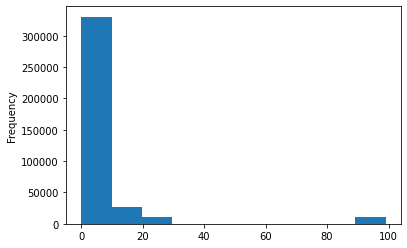

In [ ]:
df_train["auctioneerID"].plot.hist();

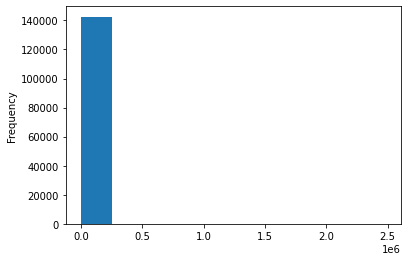

In [ ]:
df_train["MachineHoursCurrentMeter"].plot.hist();

In [ ]:
# Fill the numeric rows in df_train with mode
# Along with addition of a column that tells wether a data was null or not
def fill_missing_num(df_tmp):
  for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Addition of binary column that gives information about missin data
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with mode since it's more robust than the mean
            df_tmp[label] = content.fillna(content.mode()[0])

In [ ]:
fill_missing_num(df_train)
fill_missing_num(df_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
attri_with_null(df_train)

In [ ]:
attri_with_null(df_val)

### Filling Categorical values

In [ ]:
# Check columns which aren't numeric
def not_num(df_tmp):
  for label, content in df_tmp.items():
      if not pd.api.types.is_numeric_dtype(content):
          print(label)

In [ ]:
# Get categorical columns in Training set
not_num(df_train)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Same will be for validation and test set.

In [ ]:
# Function to turn categorical variables into numbers
def convert_to_num(df_tmp):
  for label, content in df_tmp.items():
    # Column which are not numeric
    if not pd.api.types.is_numeric_dtype(content):
       # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

### Training Data

In [ ]:
convert_to_num(df_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 78.8 MB


In [ ]:
df_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Validation Data

In [ ]:
convert_to_num(df_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(3), int16(4), int64(10), int8(40)
memory usage: 2.3 MB


In [ ]:
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [ ]:
df_train.columns.difference(df_val.columns)

Index(['auctioneerID_is_missing'], dtype='object')

In [ ]:
df_val["auctioneerID_is_missing"] = df_train["auctioneerID_is_missing"].mode()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_val = df_val[df_train.columns]

In [ ]:
df_train.columns.difference(df_val.columns)

Index([], dtype='object')

## 5. Modelling

Now all of our data is numeric and there are no missing values, we should be able to build a machine learning model!

We are going to use `RandomForestRegressor`.

In [ ]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_val, y_val = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [ ]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_val, y_val)}
    return scores

In [ ]:
# This takes too long...

# %%time
# # Retrain a model on training data
# model.fit(X_train, y_train)
# show_scores(model)

In [ ]:
len(X_train)

401125

Depending on your computer, making calculations on ~400,000 rows may take a while...

Let's alter the number of samples each `n_estimator` in the `RandomForestRegressor` see's using the `max_samples` parameter.

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

In [ ]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 51 s, sys: 515 ms, total: 51.5 s
Wall time: 30.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [ ]:
show_scores(model)

{'Training MAE': 5563.272584231848,
 'Valid MAE': 7157.904348915579,
 'Training RMSLE': 0.25762976489705114,
 'Valid RMSLE': 0.29268631662687,
 'Training R^2': 0.8604399374247089,
 'Valid R^2': 0.8340267882933863}

Beautiful, that took far less time than the model with all the data.

With this, let's try tune some hyperparameters.

### Hyperparameter tuning with RandomizedSearchCV
You can increase n_iter to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

Remember, we're trying to reduce the amount of time it takes between experiments.

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 14min 15s, sys: 8.18 s, total: 14min 23s
Wall time: 14min 20s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Get the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [ ]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5738.294364509752,
 'Valid MAE': 7257.701319969768,
 'Training RMSLE': 0.264019367673407,
 'Valid RMSLE': 0.2935153664695141,
 'Training R^2': 0.8503201702698319,
 'Valid R^2': 0.8239323096205471}

### Train a model with the best parameters
In a model I prepared earlier, I tried 100 different combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.

Note: This kind of search on my computer (n_iter = 100) took ~2-hours. So it's kind of a set and come back later experiment.

We'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.

In [ ]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 9min 46s, sys: 824 ms, total: 9min 47s
Wall time: 5min 4s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [ ]:
show_scores(ideal_model)

{'Training MAE': 2923.6196253303146,
 'Valid MAE': 5892.0266533268905,
 'Training RMSLE': 0.1432745274122052,
 'Valid RMSLE': 0.24378836060910108,
 'Training R^2': 0.9597420600796815,
 'Valid R^2': 0.8839234309260833}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

You can make a faster model by altering some of the hyperparameters. Particularly by lowering n_estimators since each increase in n_estimators is basically building another small model.

However, lowering of n_estimators or altering of other hyperparameters may lead to poorer results.

In [ ]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

In [ ]:
show_scores(fast_model)

{'Training MAE': 2546.009681454322,
 'Valid MAE': 5943.300016588435,
 'Training RMSLE': 0.1295288151374117,
 'Valid RMSLE': 0.24488509773913644,
 'Training R^2': 0.9671074553718897,
 'Valid R^2': 0.8808980340672141}

## Make predictions on test data
Now we've got a trained model, it's time to make predictions on the test data.

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Challenges/Blue Book of Bulldozers/Test.csv",
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocessing Data
We will use the function we created initially to achieve this.

In [ ]:
# Add datetime parameters for saledate
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear

# Drop original saledate
df_test.drop("saledate", axis=1, inplace=True)

# Convert strings to category
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [ ]:
# Get attributes with Null values
attri_with_null(df_test)

MachineHoursCurrentMeter


In [ ]:
# Fill null values
fill_missing_num(df_test)

In [ ]:
# Get attributes with Null values
attri_with_null(df_test)

In [ ]:
# Converting categorical data into numerical
convert_to_num(df_test)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [ ]:
df_train.columns.difference(df_test.columns)

Index(['SalePrice', 'auctioneerID_is_missing'], dtype='object')

In [ ]:
df_test["auctioneerID_is_missing"] = False

In [ ]:
df_test = df_test[df_train.drop("SalePrice", axis=1).columns]

In [ ]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

## Create DataFrame comaptible with Kaggle submission

In [ ]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17133.147909
1,1227844,16716.151517
2,1227847,49415.393900
3,1227848,69413.121215
4,1227863,60846.932836
...,...,...
12452,6643171,39126.702880
12453,6643173,12800.698697
12454,6643184,13019.114856
12455,6643186,18015.298520


In [ ]:
# Export to csv...
df_preds.to_csv("drive/MyDrive/Challenges/Blue Book of Bulldozers/predictions.csv",
                 index=False)

## Feature Importance
Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In [ ]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.26657201e-02, 1.62901034e-02, 4.14033295e-02, 1.89474457e-03,
       3.26655483e-03, 2.00216640e-01, 3.22973716e-03, 1.05281359e-03,
       4.08134052e-02, 4.75209233e-02, 6.92848267e-02, 4.58162302e-03,
       2.27366884e-02, 1.42117124e-01, 4.50996738e-02, 6.00176736e-03,
       3.86580258e-03, 1.98030281e-03, 3.20383568e-03, 6.63640081e-02,
       6.23851322e-04, 1.15583378e-04, 1.03218665e-03, 4.58119021e-04,
       1.11926143e-03, 1.79067045e-04, 2.95060305e-03, 6.30731957e-03,
       3.84798382e-03, 1.21230160e-03, 3.16089627e-03, 1.66819250e-03,
       3.62739944e-03, 6.28628750e-04, 2.14847115e-03, 8.50586884e-03,
       8.81243492e-04, 1.39818525e-02, 2.46667180e-03, 3.09942626e-03,
       1.41442234e-03, 8.59990333e-04, 3.21975333e-03, 6.09810935e-04,
       4.08193108e-04, 3.36149717e-04, 3.15392262e-04, 2.43609628e-03,
       1.39561045e-03, 2.51413628e-04, 2.50217503e-04, 7.35510020e-02,
       3.84857601e-03, 5.69635566e-03, 2.92605496e-03, 9.88657183e-03,
      

In [ ]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

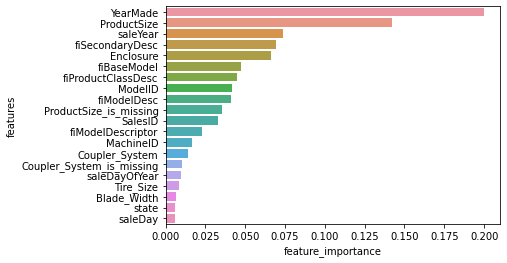

In [ ]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [ ]:
sum(ideal_model.feature_importances_)

1.0

In [ ]:
df.ProductSize.isna().sum()

216605

In [ ]:
df.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [ ]:
df.Turbocharged.value_counts()

None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64

In [ ]:
df.Thumb.value_counts()

None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64